# Pivot tabulky

Pivot tabulka (často se též používá termín kontingenční tabulka) je nástroj, který vám umožní rychle a efektivně shrnovat, analyzovat, prozkoumávat a prezentovat souhrnná data.

Jak bychom pivot tabulky mohli využít pro naše data? Pivot tabulky dokážou zobrazit vztah mezi dvěma sloupci tabulky (dvěma proměnnými), v našem případě můžeme například sledovat vztah mezi dvěma výživnými látkami. Mohli bychom tedy zkoumat, jestli při růstu množství jedné výživné látky roste (nebo naopak klesá) množství jiné výživné látky. Dále nám tabulka může usnadnit hledání vhodných potravin na základě více než jednoho kritéria. Pokud bychom například hledali potravinu, která má hodně vlákniny a současně málo nasycených tuků, museli bychom napsat poměrně složitou podmínku. Pivot tabulka nám situaci zjednoduší. Poslední příklad je zkoumání průměrného množství výživných látek v jednotlivých kategoriích potravin, kontingenční tabulky tedy mohou být alternativou k vizualizacím, které jsme si ukázali v minulé lekci.

Začneme tím, že si načteme data ze souboru `food_nutrient.csv` do tabulky `food_nutrient`.

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [124]:
# Z minule lekce
url_food_sample_100 = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/nacteni-dat/nacteni-dat/food_sample_100.csv"
url_food_other = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/spojovani/pokrocile-upravy/food_other.csv"
url_food_nutrient = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/podmineny-vyber/podmineny-vyber/food_nutrient.csv"
url_branded_food = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/spojovani/excs/znacky/branded_food.csv"

food_sample_100 = pd.read_csv(url_food_sample_100)
food_other = pd.read_csv(url_food_other)
food_nutrient = pd.read_csv(url_food_nutrient)
branded_food = pd.read_csv(url_branded_food)

food = pd.concat([food_sample_100, food_other])
food_brands = pd.merge(food, branded_food, on="fdc_id")

food_brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9541 entries, 0 to 9540
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fdc_id                       9541 non-null   int64  
 1   data_type                    9541 non-null   object 
 2   description                  9541 non-null   object 
 3   food_category_id             0 non-null      float64
 4   publication_date             9541 non-null   object 
 5   brand_owner                  9475 non-null   object 
 6   brand_name                   6818 non-null   object 
 7   subbrand_name                483 non-null    object 
 8   gtin_upc                     9541 non-null   int64  
 9   ingredients                  9511 non-null   object 
 10  not_a_significant_source_of  387 non-null    object 
 11  serving_size                 9541 non-null   float64
 12  serving_size_unit            9495 non-null   object 
 13  household_serving_

V `pandas` existuje několik funkcí. My začneme s funkcí `pivot()`. Tato funkce slouží k "přeskládání" tabulky. Výsledná tabulka nebude mít samostatný řádek pro každou kombinaci potraviny a výživné látky. Tabulku přeskládáme tak, aby každá potravina měla pouze jeden řádek a jednotlivé výživné látky budou uloženy ve sloupcích. Namísto sloupce `name` s názvem výživné látky budeme mít názvy výživných látek přímo ve sloupcích. 

Funkci `pivot` určíme čtyři parametry, kromě prvního parametru `data` musíme všechny psát jako pojmenované:

- Prvním parametrem (`data`) určujeme tabulku, se kterou bude funkce pracovat.
- Parametr `index` slouží jako popisek řádků. V našem případě zvolíme sloupeček `fdc_id`, tj. unikátní číslo potraviny.
- Parametr `columns` bude použit k vytvoření nových sloupečků. Každá unikátní hodnota v tomto sloupci bude znamenat nový sloupeček ve výsledné tabulce. Sem doplníme sloupec `name`.
- Parametr `value` označuje sloupec, ze kterého budou čteny hodnoty. V našem případě půjde o sloupec `amount`. Funkce `pivot` se pro každý řádek původní tabulky "podívá" na sloupce `fdc_id` a `name`, tj. na číslo potraviny a název výživné látky. Hodnotu, která je ve sloupci `amount`, pak doplní do nové tabulky na řádek se stejným `fdc_id` a do sloupce pro příslušnou výživnou látku.

Pozor na to, že kombinace každé dvojice sloupců `index` a `columns` může být v původní tabulce pouze jednou, jinak by totiž nebylo možné data "přeskládat" - do jednoho políčka tabulky bychom museli nacpat více než jednu hodnotu. Funkce na takovou situaci reaguje chybou. Pokud máme v tabulce malé množství duplicitních hodnot, můžeme je odstranit s využitím metody `drop_duplicates()`. Použijeme metodu pro naše data. Využijeme parametr `subset` a do něj vložíme názvy sloupců, podle kterých má být duplicita rozpoznána.

In [125]:
food_nutrient = food_nutrient.drop_duplicates(subset=["fdc_id", "name"])

U funkce `pivot()` je důležité, abychom pro každou kombinaci `fdc_id` a `name` měli pouze jeden řádek. Funkce totiž neprovádí žádnou agregaci. Pokud bychom agregaci potřebovali provést, musíme použít některou z funkcí, které si ukážeme dále.

Níže je použití funkce `pivot`.

In [126]:
food_nutrient_pivot = pd.pivot(food_nutrient, index="fdc_id", columns="name", values="amount")
food_nutrient_pivot.head()

name,"Ergosta-5,7-dienol",25-hydroxycholecalciferol,Alanine,"Alcohol, ethyl",Arginine,Ash,Aspartic acid,Beta-glucan,Beta-sitostanol,Beta-sitosterol,...,Vitamin K (phylloquinone),Water,Xylitol,Zeaxanthin,"Zinc, Zn",cis-Lutein/Zeaxanthin,cis-Lycopene,cis-beta-Carotene,trans-Lycopene,trans-beta-Carotene
fdc_id,,,,,,,,,,,,,,,,,,,,,
167551,NaN,NaN,0.392,0.0,0.489,1.80,0.572,NaN,NaN,NaN,...,3.9,3.30,NaN,NaN,1.24,NaN,NaN,NaN,NaN,NaN
167711,NaN,NaN,NaN,0.0,NaN,0.58,NaN,NaN,NaN,NaN,...,0.1,87.63,NaN,NaN,0.16,NaN,NaN,NaN,NaN,NaN
168370,NaN,NaN,1.782,0.0,2.004,1.14,2.910,NaN,NaN,NaN,...,0.0,66.99,NaN,NaN,2.86,NaN,NaN,NaN,NaN,NaN
168460,NaN,NaN,0.355,0.0,0.585,1.10,1.148,NaN,NaN,NaN,...,70.6,79.45,NaN,NaN,1.04,NaN,NaN,NaN,NaN,NaN
168526,NaN,NaN,NaN,NaN,0.222,1.24,NaN,NaN,NaN,NaN,...,NaN,75.48,NaN,NaN,1.03,NaN,NaN,NaN,NaN,NaN


K tabulce `food_nutrient_pivot` můžeme připojit další informace o potravinách, se kterými jsme pracovali v předchozích lekcích. Budeme tedy vědět, kterých potravin se každý řádek týká.

In [127]:
food_nutrient_pivot = pd.merge(food_nutrient_pivot, food_brands, on="fdc_id")

Po úpravě dat s využitím funkce `pivot()` můžeme snadno vytvořit další typ grafu, a to je :term{cs="bodový graf" en="scatter plot"}. Bodový graf bude mít na svislé i vodorovné ose množství některé z výživných látek. Pomocí bodového grafu uvidíme, jestli může být mezi množstvím výživných látek nějaká souvislost. Vraťme se opět k výzkumu o kardiovaskulárním systému. Pro něj mohou být škodlivé nasycené kyseliny a cholesterol. Pomocí bodového grafu se můžeme podívat, jestli mají sýry s větším množstvím nasycených kyselin i větší množství cholesterolu. Graf doplníme popiskem, musíme pro něj využít mírně odlišnou syntaxi.

Text(40.347222222222214, 0.5, 'Cholesterol')

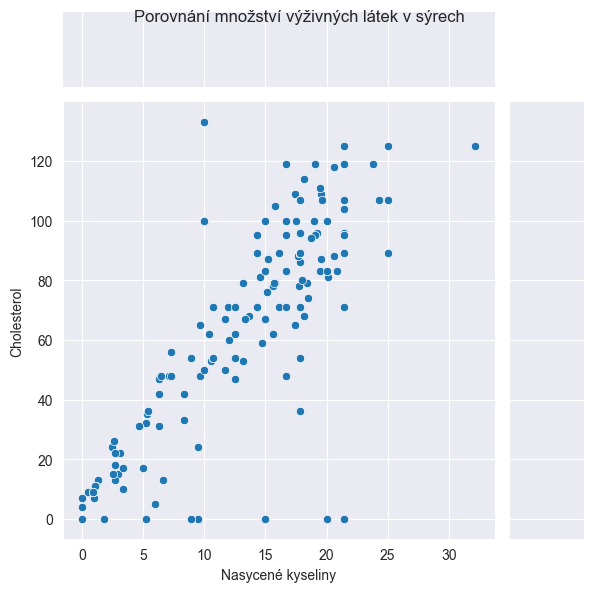

In [128]:
import seaborn as sns

cheese = food_nutrient_pivot[food_nutrient_pivot["branded_food_category"] == "Cheese"]
g = sns.JointGrid(cheese, x="Fatty acids, total saturated", y="Cholesterol")
g.plot_joint(sns.scatterplot)
g.fig.suptitle("Porovnání množství výživných látek v sýrech")
g.ax_joint.set_xlabel("Nasycené kyseliny")
g.ax_joint.set_ylabel("Cholesterol")

### Skupiny

Na zakládě nějaké číselné hodnoty můžeme data rozdělit i do skupin. Každá skupina potřebuje dvě věci:

- číselný interval, který udává rozsah pro zařazení do skupiny,
- označení skupiny.

Uvažujme následující skupiny.

| Obsah cholesterolu     | Kategorie           |
|------------------------|---------------------|
| 0-20                   | Low Cholesterol     |
| 20-100                 | Moderate Cholesterol|
| 100-inf                | High Cholesterol    |

Každé potravině můžeme přiřadit popisek, která nám usnadní psaní dotazů.

In [129]:
bins = [0, 20, 100, float('inf')]
labels = ['Low Cholesterol', 'Moderate Cholesterol', 'High Cholesterol']

food_nutrient_pivot['Cholesterol Category'] = pd.cut(food_nutrient_pivot['Cholesterol'], bins=bins, labels=labels)
food_nutrient_pivot['Cholesterol Category'].head(10)

0         Low Cholesterol
1                     NaN
2                     NaN
3         Low Cholesterol
4                     NaN
5    Moderate Cholesterol
6                     NaN
7                     NaN
8         Low Cholesterol
9         Low Cholesterol
Name: Cholesterol Category, dtype: category
Categories (3, object): ['Low Cholesterol' < 'Moderate Cholesterol' < 'High Cholesterol']

Pokud bychom chtěli zkoumat množství cholesterolu v různých typech potravin, můžeme použít vizualizaci `countplot`, kterou už jsme si ukazovali v minulé lekci.  
V grafu pak uvidíme, kolik je v každé skupině potravin s nízkým obsahem cholesterolu, se středním a vysokým.

<Axes: xlabel='count', ylabel='branded_food_category'>

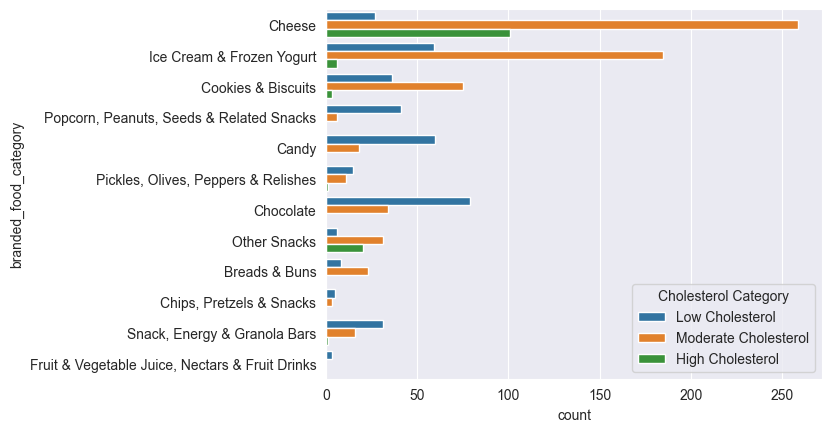

In [130]:
top_cat_list = ['Candy', 'Popcorn, Peanuts, Seeds & Related Snacks', 'Cheese', 'Ice Cream & Frozen Yogurt', 'Chips, Pretzels & Snacks', 'Cookies & Biscuits', 'Pickles, Olives, Peppers & Relishes', 'Breads & Buns', 'Fruit & Vegetable Juice, Nectars & Fruit Drinks', 'Snack, Energy & Granola Bars', 'Chocolate', 'Other Snacks']
food_nutrient_pivot = food_nutrient_pivot[food_nutrient_pivot["branded_food_category"].isin(top_cat_list)]
sns.countplot(food_nutrient_pivot, y="branded_food_category", hue="Cholesterol Category")

---
## Cvičení

### Dvě kritéria

*Poznámka:* Zadání tohoto příkladu ti možná bude připadat povědomé, bylo již v lekci o podmíněném výběru. Pokud jsi ale příklad neřešil(a), nevadí. Pokud ano, uvidíš, že řešení bude díky funkci `pivot()` mnohem jednodušší.

Připravujeme seznam potravin pro účely lékařského výzkumu, který se bude zabývat kardiovaskulárním systémem. Chceme vybrat pottraviny, které splňují dvě kritéria:

- nízký obsah nasycených mastných kyselin (`"Fatty acids, total saturated"`, uvažuj méně než 1 gram),
- vysoký obsah vlákniny (`"Fiber, total dietary"`, uvažuj více než 5 gramů).

Zatímco nasycené mastné kyseliny jsou považovány za spíše škodlivé pro kardiovaskulární systém, vláknina je považována spíše za prospěšnou. Vyber z tabulky `food_nutrient_pivot` potraviny, které vyhovují oběma podmínkám.

In [131]:
fat_condition = food_nutrient_pivot['Fatty acids, total saturated'] < 1
fiber_condition = food_nutrient_pivot['Fiber, total dietary'] > 5
selection = food_nutrient_pivot[fat_condition & fiber_condition]
selection.head()

,fdc_id,"Ergosta-5,7-dienol",25-hydroxycholecalciferol,Alanine,"Alcohol, ethyl",Arginine,Ash,Aspartic acid,Beta-glucan,Beta-sitostanol,...,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,short_description,Cholesterol Category
199,381237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LI,NaN,2018-08-15,2019-04-01,United States,NaN,NaN,NaN,NaN,NaN
260,393002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LI,NaN,2018-03-10,2019-04-01,United States,NaN,NaN,NaN,NaN,NaN
453,431308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LI,NaN,2018-06-21,2019-04-01,United States,NaN,NaN,NaN,NaN,NaN
479,438839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LI,NaN,2018-06-02,2019-04-01,United States,NaN,NaN,NaN,NaN,Moderate Cholesterol
488,440221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LI,NaN,2018-02-17,2019-04-01,United States,NaN,NaN,NaN,NaN,NaN


## Další funkce pro tvorbu pivot tabulek

Pivot tabulky velmi často provádíme v kombinaci s nějakou agregací. Uvažujme například, že by nás zajímal průměrný obsah výživných látek za jednotlivé kategorie, nikoli za konkrétní potraviny. 

In [132]:
food_merged = pd.merge(food, food_nutrient, on="fdc_id")
food_merged = pd.merge(food_merged, branded_food, on="fdc_id")

Protože v datech máme obrovské množství různých kategorií i výživných látek, u dat provedeme filtrování. Výběr kategorií s největším počtem potravin jsme již provedli v lekci o vizualizacích. Nyní provedeme výběr výživných látek. Pro naši kontingenční tabulku si vybereme tyto výživné látky:

- `Protein` (bílkoviny),
- `Sodium, Na` (sodík, Na),
- `Total lipid (fat)` (lipidy (tuky)),
- `Carbohydrate, by difference` (sacharidy, měřené rozdílově),
- `Sugars, total including NLEA` (cukry, celkem včetně NLEA),
- `Fatty acids, total saturated` (nasycené mastné kyseliny, celkem),
- `Cholesterol` (cholesterol),
- `Fiber, total dietary` (vláknina, celková stravová),
- `Calcium, Ca` (vápník, Ca),
- `Iron, Fe` (železo, Fe).

Filtrování je níže.

In [133]:
top_nutrient_list = ["Protein", "Sodium, Na", "Total lipid (fat)", "Carbohydrate, by difference", "Sugars, total including NLEA", "Fatty acids, total saturated", "Cholesterol", "Fiber, total dietary", "Calcium, Ca", "Iron, Fe"]
food_merged = food_merged[food_merged["name"].isin(top_nutrient_list)]

Nejprve si vyzkoušíme funkci `pivot_table()`. Pozor, jedná se o odlišnou funkci, než kterou jsme využívali v předchozí lekci. Funkci `pivot_table` určíme pět parametrů, tj. o jeden parametr víc, než kolik jsme zadávali funkci `pivot()`.

- Prvním parametrem (`data`) určujeme tabulku, se kterou bude funkce pracovat.
- Druhý parametr (`value`) obsahuje název sloupce, ze kterého budou čteny hodnoty, které budou "ve vnitřní části" tabulky. V tomto případě již může být pro každou kombinaci názvu řádku a názvu sloupce více hodnot, protože funkce počítá s provedením agregace.
- Třetí parametr (`index`) slouží jako popisek řádků. V našem případě zvolíme sloupeček `"branded_food_category"`, tj. název kategorie.
- Čtvrtý parametr (`columns`) bude použit k vytvoření nových sloupečků. Sem doplníme sloupec `name`.
- Jako pátý parametr (`aggfunc`) je třeba vložit název funkce, která bude použita k agregaci hodnot. Protože předpokládáme, že pro každou kombinaci kategorie a výživné látky budeme znát více hodnot (protože v každé kategorii máme spousty potravin), je třeba použít nějakou funkci, která z těchto hodnot vypočte jedno číslo. Jedná se obdobu agregace, na což odkazuje i název parametru. Pokud bychom chtěli spočítat průměrnou hodnotu, můžeme například použít funkci `mean()` z modulu `numpy`. Pozor na to, že píšeme pouze název funkce **bez závorek**. Neprovádíme totiž volání funkce, to dělá funkce `pivot_table` za nás.

Na rozdíl od funkce `pivot()` nemusíme parametry psát jako pojmenované. 

In [134]:
pd.pivot_table(food_merged, "amount", "branded_food_category", "name", np.mean)

C:\Users\Jakub\AppData\Local\Temp\ipykernel_4820\747385905.py:1: FutureWarning: The provided callable <function mean at 0x000002576F1FE2A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(food_merged, "amount", "branded_food_category", "name", np.mean)


name,"Calcium, Ca","Carbohydrate, by difference",Cholesterol,"Fatty acids, total saturated","Fiber, total dietary","Iron, Fe",Protein,"Sodium, Na","Sugars, total including NLEA",Total lipid (fat)
branded_food_category,,,,,,,,,,
Alcohol,19.600000,26.295263,1.363636,1.873636,0.700000,0.612222,0.684000,169.444444,21.923889,1.637895
All Noodles,17.833333,65.386842,43.368421,1.578947,2.821053,2.068333,11.107368,453.055556,1.970526,4.887368
Baby/Infant Foods/Beverages,20.000000,13.855000,0.000000,0.000000,2.750000,0.365000,1.140000,16.000000,7.920000,0.000000
Bacon,NaN,15.200000,NaN,1.600000,3.200000,12.000000,45.200000,1192.000000,8.800000,7.600000
"Bacon, Sausages & Ribs",13.947368,2.320400,85.370370,11.124815,0.060000,1.028571,27.239630,1306.925926,1.948696,31.967778
...,...,...,...,...,...,...,...,...,...,...
Weight Control,154.000000,7.690000,2.000000,0.310000,1.500000,0.830000,3.080000,58.000000,5.540000,1.850000
Wholesome Snacks,28.609524,47.733496,0.200000,3.158544,4.643443,1.004854,1.485645,57.914530,34.243710,4.118793
Yogurt,137.231214,11.986836,8.959770,1.552339,1.042857,0.083681,5.596461,53.238636,9.245730,2.414318


Z výsledné tabulky vidíme, jak se liší průměrné množství výživných látek v jednotlivých potravinách. Kupříkladu sýry jsou poměrně bohaté na vápník a cholesterol, naopak je v nich poměrně málo vlákniny.

Alternativou k funkci `pivot_table()` je funkce `crosstab()`. Ta se liší od funkce `pivot_table()` především v tom, že jí zadáváme data jako série hodnot, nikoli jako tabulku a následně názvy sloupců.

In [135]:
pd.crosstab(food_merged["branded_food_category"], food_merged["name"], food_merged["amount"], aggfunc=np.mean)

C:\Users\Jakub\AppData\Local\Temp\ipykernel_4820\3469730126.py:1: FutureWarning: The provided callable <function mean at 0x000002576F1FE2A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.crosstab(food_merged["branded_food_category"], food_merged["name"], food_merged["amount"], aggfunc=np.mean)


name,"Calcium, Ca","Carbohydrate, by difference",Cholesterol,"Fatty acids, total saturated","Fiber, total dietary","Iron, Fe",Protein,"Sodium, Na","Sugars, total including NLEA",Total lipid (fat)
branded_food_category,,,,,,,,,,
Alcohol,19.600000,26.295263,1.363636,1.873636,0.700000,0.612222,0.684000,169.444444,21.923889,1.637895
All Noodles,17.833333,65.386842,43.368421,1.578947,2.821053,2.068333,11.107368,453.055556,1.970526,4.887368
Baby/Infant Foods/Beverages,20.000000,13.855000,0.000000,0.000000,2.750000,0.365000,1.140000,16.000000,7.920000,0.000000
Bacon,NaN,15.200000,NaN,1.600000,3.200000,12.000000,45.200000,1192.000000,8.800000,7.600000
"Bacon, Sausages & Ribs",13.947368,2.320400,85.370370,11.124815,0.060000,1.028571,27.239630,1306.925926,1.948696,31.967778
...,...,...,...,...,...,...,...,...,...,...
Weight Control,154.000000,7.690000,2.000000,0.310000,1.500000,0.830000,3.080000,58.000000,5.540000,1.850000
Wholesome Snacks,28.609524,47.733496,0.200000,3.158544,4.643443,1.004854,1.485645,57.914530,34.243710,4.118793
Yogurt,137.231214,11.986836,8.959770,1.552339,1.042857,0.083681,5.596461,53.238636,9.245730,2.414318


#### Relativní počty

Vraťme se ještě ke kategoriím potravin v závislosti na množství cholesterolu. I tato data můžeme zobrazit pomocí pivot tabulky. Pro každou kategorii potravit si můžeme vypočítat, kolik je v kategorii potravin s vysokým, středním a nízkám obsahem cholesterolu. K tomu si nejprve musíme připravit data, tj. zopakujeme postup z předchozí části lekce.

In [136]:
food_nutrient = food_nutrient.drop_duplicates(subset=["fdc_id", "name"])
food_nutrient_pivot = pd.pivot(food_nutrient, index="fdc_id", columns="name", values="amount")
food_brands = pd.merge(food, branded_food, on="fdc_id")
food_nutrient_pivot = pd.merge(food_nutrient_pivot, food_brands, on="fdc_id")

bins = [0, 20, 100, float('inf')]
labels = ['Low Cholesterol', 'Moderate Cholesterol', 'High Cholesterol']

food_nutrient_pivot['Cholesterol Category'] = pd.cut(food_nutrient_pivot['Cholesterol'], bins=bins, labels=labels)
top_cat_list = ['Candy', 'Popcorn, Peanuts, Seeds & Related Snacks', 'Cheese', 'Ice Cream & Frozen Yogurt', 'Chips, Pretzels & Snacks', 'Cookies & Biscuits', 'Pickles, Olives, Peppers & Relishes', 'Breads & Buns', 'Fruit & Vegetable Juice, Nectars & Fruit Drinks', 'Snack, Energy & Granola Bars', 'Chocolate', 'Other Snacks']
food_nutrient_pivot = food_nutrient_pivot[food_nutrient_pivot["branded_food_category"].isin(top_cat_list)]

Tentokrát chceme spočítat, kolik máme záznamů pro každou dvojici kategorie potraviny a kategorie z pohledu množství cholesterolu. Pokud chceme provést tento výpočet, máme dvě možnosti: použít funkci `pivot_table` a jako agregační funkci `aggfunc` můžeme použít například funkci `len`. Funkce `crosstab` je pro tento účel jednodušší, té nyní zadáme pouze série s popiskem řádku tabulky (indexem) a popiskem sloupců tabulky. Pokud funkce dostane pouze tyto dvě série, dopočítá počty hodnot pro každou dvojici. Tím pádem je pro tento účel jednodušší.

In [137]:
food_pivot_cholesterol_pivot = pd.crosstab(food_nutrient_pivot["branded_food_category"], food_nutrient_pivot["Cholesterol Category"])
food_pivot_cholesterol_pivot

Cholesterol Category,Low Cholesterol,Moderate Cholesterol,High Cholesterol
branded_food_category,,,
Breads & Buns,8,23,0
Candy,60,18,0
Cheese,27,259,101
"Chips, Pretzels & Snacks",5,3,0
Chocolate,79,34,0
Cookies & Biscuits,36,75,3
"Fruit & Vegetable Juice, Nectars & Fruit Drinks",3,0,0
Ice Cream & Frozen Yogurt,59,185,6
Other Snacks,6,31,20


V řadě případů může být jednodušší podívat se na relativní počty, tj. na procentuální zastoupení jednotlivých skupin. Tím sice přijdeme o část informace (z tabulky pak není zřejmé, kolik je výrobků v jednotlivých kategoriích a kolik celkem máme dat), na druhou stranu jsou data lépe čitelná a řádky jsou lépe porovnatelné mezi sebou.

In [138]:
food_pivot_cholesterol_pivot = pd.crosstab(food_nutrient_pivot["branded_food_category"], food_nutrient_pivot["Cholesterol Category"], normalize="index")
food_pivot_cholesterol_pivot

Cholesterol Category,Low Cholesterol,Moderate Cholesterol,High Cholesterol
branded_food_category,,,
Breads & Buns,0.258065,0.741935,0.000000
Candy,0.769231,0.230769,0.000000
Cheese,0.069767,0.669251,0.260982
"Chips, Pretzels & Snacks",0.625000,0.375000,0.000000
Chocolate,0.699115,0.300885,0.000000
Cookies & Biscuits,0.315789,0.657895,0.026316
"Fruit & Vegetable Juice, Nectars & Fruit Drinks",1.000000,0.000000,0.000000
Ice Cream & Frozen Yogurt,0.236000,0.740000,0.024000
Other Snacks,0.105263,0.543860,0.350877


S takto vytvořenou tabulkou můžeme dál pracovat, například můžeme používat dotazy. Pokud bychom například chtěli obecně doporučit kategorie potravin, které mají většinou nízké množství cholesterolu, můžeme využít dotaz. Například si můžeme nechat zobrazit řádky, kde má sloupec `Low Cholesterol` vyšší hodnotu než 0.5.

In [139]:
food_pivot_cholesterol_pivot[food_pivot_cholesterol_pivot["Low Cholesterol"] > 0.5]

Cholesterol Category,Low Cholesterol,Moderate Cholesterol,High Cholesterol
branded_food_category,,,
Candy,0.769231,0.230769,0.000000
"Chips, Pretzels & Snacks",0.625000,0.375000,0.000000
Chocolate,0.699115,0.300885,0.000000
"Fruit & Vegetable Juice, Nectars & Fruit Drinks",1.000000,0.000000,0.000000
"Pickles, Olives, Peppers & Relishes",0.555556,0.407407,0.037037
"Popcorn, Peanuts, Seeds & Related Snacks",0.872340,0.127660,0.000000
"Snack, Energy & Granola Bars",0.645833,0.333333,0.020833


### Standardizace a teplotní mapa

Kontingenční tabulka je časově náročná na čtení, především v případě, že má poměrně hodně řádků nebo sloupců. Pro rychlý přehled může být užitečnější typ vizualizace označovaný jako :term{cs="teplotní mapa" en="heat map"}. Ten převede hodnotu na barevnou škálu. V teplotní mapě můžeme rychle nalézt především výrazně nadprůměrné či podprůměrné hodnoty. U našich dat ale může být problém v tom, že máme v různých sloupcích řádově odlišné hodnoty. Je to samozřejmě ovlivněno tím, že některé výživné látky jsou zobrazné v odlišných jednotkách (množství látky v gramech a miligramech na 100 gramů potraviny). Problém bychom nevyřešili ani převodem na stejné jednotky. Vápníku nebo sodíku totiž bude v potravinách většinou řádově méně než proteinů nebo cukrů.

Problém ale můžeme vyřešit pomocí procesu označovaného jako :term{cs="normalizace" en="normalization"}. Normalizace dat v kontextu statistiky a zpracování dat znamená převedení různých rozsahů hodnot na společnou škálu, čímž se usnadňuje jejich srovnání a analýza. Tento proces pomáhá odstranit zkreslení v datech způsobená různými měřítky a umožňuje lépe identifikovat vzory a vztahy mezi proměnnými. Normalizace je klíčová pro efektivní algoritmické zpracování, například :term{cs="strojovém učení" en="machine learning"} v datové analýze.

Prakticky normalizace obsahuje dva kroky:

- Od hodnot odečteme průměr. Tím pádem se normalizované hodnoty budou pohybovat kolem nuly. Pokud bude nějaká normalizovaná hodnota záporná, v původních datech byla podprůměrná. Pokud bude normalizovaná hodnota kladná, v původních datech byla nadprůměrná.
- Vydělíme data jejich variabilitou, konkrétně směrodatnou odchylkou. Tím data převedeme na stejné jednotky. Data se budou pohybovat ve stejných jednotkách, ať už byla původní data v desetinných číslech nebo v milionech.

Zde je kompletní kód na přípravu výchozí tabulky.

In [140]:
top_cat_list = ['Candy', 'Popcorn, Peanuts, Seeds & Related Snacks', 'Cheese', 'Ice Cream & Frozen Yogurt', 'Chips, Pretzels & Snacks', 'Cookies & Biscuits', 'Pickles, Olives, Peppers & Relishes', 'Breads & Buns', 'Fruit & Vegetable Juice, Nectars & Fruit Drinks', 'Snack, Energy & Granola Bars', 'Chocolate', 'Other Snacks']
food_merged = food_merged[food_merged["branded_food_category"].isin(top_cat_list)]

food_pivot = pd.crosstab(food_merged["branded_food_category"], food_merged["name"], food_merged["amount"], aggfunc=np.mean)
food_pivot.head()

C:\Users\Jakub\AppData\Local\Temp\ipykernel_4820\899985209.py:4: FutureWarning: The provided callable <function mean at 0x000002576F1FE2A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  food_pivot = pd.crosstab(food_merged["branded_food_category"], food_merged["name"], food_merged["amount"], aggfunc=np.mean)


name,"Calcium, Ca","Carbohydrate, by difference",Cholesterol,"Fatty acids, total saturated","Fiber, total dietary","Iron, Fe",Protein,"Sodium, Na","Sugars, total including NLEA",Total lipid (fat)
branded_food_category,,,,,,,,,,
Breads & Buns,86.738397,49.977869,5.305085,0.774226,3.735246,2.547083,9.323796,508.426829,5.799218,5.190041
Candy,45.145455,76.501801,5.498305,5.549302,1.382993,0.699011,2.899155,98.062802,58.791884,8.075506
Cheese,570.703046,4.994888,76.840000,15.422928,0.170419,2.387632,19.969457,723.591584,1.808579,25.227139
"Chips, Pretzels & Snacks",58.746544,58.940776,0.948598,3.899954,5.423182,1.961475,8.944318,640.990826,4.024818,24.957227
Chocolate,99.737705,55.725380,11.785714,18.123514,4.787097,3.485838,6.695968,122.437838,43.997622,30.863459


Nejprve tedy provedeme normalizaci dat.

In [141]:
food_pivot_norm = (food_pivot - food_pivot.mean()) / food_pivot.std()

A ve druhém kroku vytvoříme teplotní mapu.

C:\Users\Jakub\AppData\Local\Temp\ipykernel_4820\2517468229.py:1: FutureWarning: The provided callable <function mean at 0x000002576F1FE2A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  food_nutrient_pivot = pd.crosstab(food_merged["branded_food_category"], food_merged["name"], food_merged["amount"], aggfunc=np.mean)


[Text(0.5, 23.52222222222222, 'Výživná látka'),
 Text(50.7222222222222, 0.5, 'Kategorie'),
 Text(0.5, 1.0, 'Množství průměrných látek dle kategorií')]

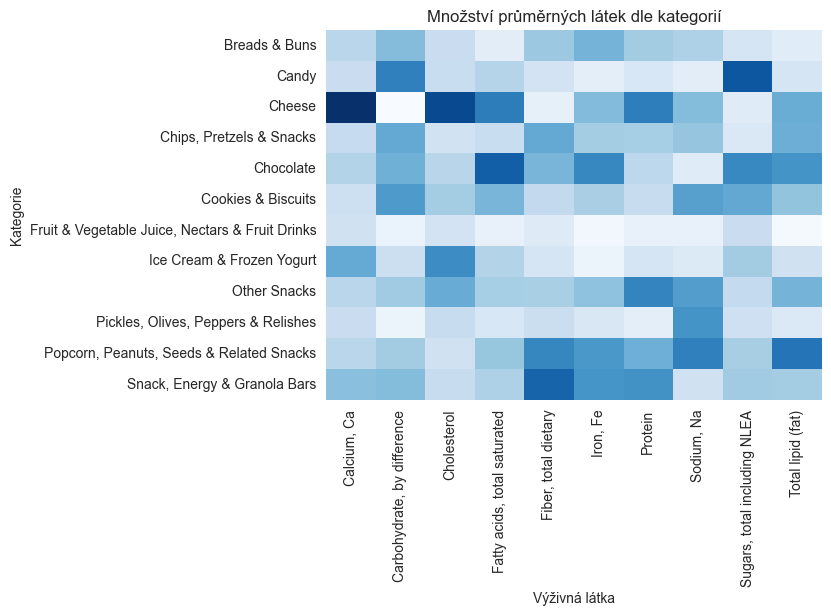

In [142]:
food_nutrient_pivot = pd.crosstab(food_merged["branded_food_category"], food_merged["name"], food_merged["amount"], aggfunc=np.mean)
ax = sns.heatmap(food_pivot_norm, cmap="Blues", cbar=False)
ax.set(xlabel="Výživná látka", ylabel="Kategorie", title="Množství průměrných látek dle kategorií")

Pro lepší čitelnost můžeme změnit výchozí barevnou škálu pomocí parametru `cmap`. Můžeme použít například škálu `"Blues"`, která je postavená na sytosti modré barvy.

---
## Cvičení

### Booking

Stáhni si data ze souboru o rezervacích hotelů ze serveru Booking.com. Data jsou uložená v souboru [hotel_bookings.csv](https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/pivot-tabulky/dalsi-funkce/booking/hotel_bookings.csv). U rezervací evidujeme, jestli byly zrušené, to najdeme ve sloupci `is_canceled` (1 pro zrušené rezervace a 0 pro nezrušené). Vytvoř kontingenční tabulku, která porovná počet zrušených rezervací podle typu hotelu (sloupec `hotel`). Je více rezervací zrušeno pro městské hotely nebo pro hotely v rezortech?

Dále zkus rezervace rozdělit do skupin podle toho, v jakém předstihu byly rezervace provedeny. Zaměř se pouze na rezervace v městkých hotelech, tj. vytvoř tabulku, která bude obsahovat pouze data, které mají ve sloupci `hotel` hodnotu `City Hotel`- Využij sloupec `lead_time`. Níže máš skupiny, podle kterých můžeš data rozdělit. Vytvoř si pivot tabulku, která zobrazuje počty rezervací v jednotlivých kategoriích v závislosti na tom, jestli byly zrušeny nebo ne. Pro které kategorie je více zrušených rezervací a pro které naopak více nezrušených? A v jaké skupině je celkově nejvíce rezervací?

| Lead Time              | Reservation Category    |
|------------------------|-------------------------|
| 0-7                    | Last-minute             |
| 8-30                   | Short-term              |
| 31-180                 | Medium-term             |
| 180-inf                | Long-term               |


In [143]:
data = pd.read_csv('https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/pivot-tabulky/dalsi-funkce/booking/hotel_bookings.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [144]:
data = data[data['hotel'] == 'City Hotel']

bins = [0, 7, 30, 180, float('inf')]
labels = ['Last-minute', 'Short-term', 'Medium-term', 'Long-term']
data['lead_time_category'] = pd.cut(data['lead_time'], bins=bins, labels=labels)

data_pivot = pd.crosstab(data["lead_time_category"], data["is_canceled"])
data_pivot.rename(columns={0: 'Canceled', 1: 'Ok'}, inplace=True)
data_pivot

is_canceled,Canceled,Ok
lead_time_category,,
Last-minute,6653,1046
Short-term,8674,3880
Medium-term,21974,17046
Long-term,6091,10857


### Titanic a další pivot tabulky

K tomuto cvičení využij data o cestujících na Titanicu ze souboru [titanic.csv](https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/pivot-tabulky/dalsi-funkce/titanic/titanic.csv).

Vytvoř další kontingenční tabulku, která porovná závislost mezi třídou (sloupec `Pclass`), ve které cestoval, a tím, jestli přežil. Zkus spočítat počty přeživších z každé třídy. Dále zkus vypočítat relativní počet přeživších pro jednotlivé třídy. Dále zkus vytvořit tabulku s relativním počtem přeživších v závislosti na pohlaví (sloupec `Sex`).

In [145]:
data = pd.read_csv("https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/pivot-tabulky/dalsi-funkce/titanic/titanic.csv")
data_pivot = pd.crosstab(data["Pclass"], data["Survived"])
data_pivot

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [146]:
data_pivot = pd.crosstab(data["Pclass"], data["Survived"], normalize="index")
data_pivot

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [147]:
data_pivot = pd.crosstab(data["Sex"], data["Survived"])
data_pivot

Survived,0,1
Sex,,
female,81,233
male,468,109


In [148]:
data_pivot = pd.crosstab(data["Sex"], data["Survived"], normalize="index")
data_pivot

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


---
## Bonusy

### Doprava

Stáhni si data ze souboru [traffic.csv](https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/pivot-tabulky/dalsi-funkce/doprava/traffic.csv), který zobrazuje počet aut v hodinových intervalech na čtyřech různých křižovatkách.

Pro následující dva úkoly využij funkci `cut`.

- Tabulka je poměrně velká, zkusme tedy rozdělit den na několik částí v závislosti na hodině měření (sloupec `Hour`):
  - noc (22 hodin až 5 hodin),
  - ranní špička (6 hodin až 9 hodin),
  - poledne (10 hodin až 13 hodin),
  - odpolední špička (14 hodin až 16 hodin),
  - večer (17 hodin až 21 hodin).
- Dny v týdnu (sloupec `DayOfWeek`) rozděl na pracovní dny a víkend. Nejprve je třeba se ujistit, které číslo znamená který den. Podívej se například první záznam. Tam je datum 2015-11-01, tj 11. listopad 2015. Ve sloupci `DayOfWeek` je hodnota 6. Podívej se do kalendáře, který den v týdnu to je. Od jakého čísla jsou dny v týdnu v tabulce počítané?


Nakonec pomocí pivot tabulky průměrné počty aut (sloupec `Vehicles`) v jednotlivých částech dne a typech dne.

Tipy:

- Všimni si, že noc je rozdělená na dvě části - od půlnoci do 5 hodin a od 22 hodin do půlnoci. Bohužel musí být seznam názvů skupin unikátní, můžeš ale například vytvořit skupiny `noc_1` a `noc_2`. Poté můžeš podřetězce `_1` a `_2` odstranit pomocí metody `.str.replace()`.

In [149]:
data = pd.read_csv("https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/pivot-tabulky/dalsi-funkce/doprava/traffic.csv")
data.head()

,DateTime,Junction,Vehicles,ID,DayOfWeek,Hour
0,2015-11-01 00:00:00,1,15,20151101001,6,0
1,2015-11-01 01:00:00,1,13,20151101011,6,1
2,2015-11-01 02:00:00,1,10,20151101021,6,2
3,2015-11-01 03:00:00,1,7,20151101031,6,3
4,2015-11-01 04:00:00,1,9,20151101041,6,4


In [150]:
bins = [0, 5, 9, 13, 16, 21, 24]
labels = ["noc_1", "ranní špička", "poledne", "odpolední špička", "večer", "noc_2"]
data['HourGroup'] = pd.cut(data["Hour"], bins=bins, labels=labels)

data["HourGroup"] = data["HourGroup"].str.replace("_1", "")
data["HourGroup"] = data["HourGroup"].str.replace("_2", "")

bins = [1, 5, 6]
labels = ["weekday", "weekend"]
data['DayOfWeekGroup'] = pd.cut(data["DayOfWeek"], bins=bins, labels=labels)

data.head(15)

,DateTime,Junction,Vehicles,ID,DayOfWeek,Hour,HourGroup,DayOfWeekGroup
0,2015-11-01 00:00:00,1,15,20151101001,6,0,NaN,weekend
1,2015-11-01 01:00:00,1,13,20151101011,6,1,noc,weekend
2,2015-11-01 02:00:00,1,10,20151101021,6,2,noc,weekend
3,2015-11-01 03:00:00,1,7,20151101031,6,3,noc,weekend
4,2015-11-01 04:00:00,1,9,20151101041,6,4,noc,weekend
5,2015-11-01 05:00:00,1,6,20151101051,6,5,noc,weekend
6,2015-11-01 06:00:00,1,9,20151101061,6,6,ranní špička,weekend
7,2015-11-01 07:00:00,1,8,20151101071,6,7,ranní špička,weekend
8,2015-11-01 08:00:00,1,11,20151101081,6,8,ranní špička,weekend
9,2015-11-01 09:00:00,1,12,20151101091,6,9,ranní špička,weekend


In [151]:
data_pivot = pd.pivot_table(data, values="Vehicles", index="HourGroup", columns="DayOfWeekGroup", aggfunc=np.mean, margins=True)
data_pivot

C:\Users\Jakub\AppData\Local\Temp\ipykernel_4820\911685998.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  data_pivot = pd.pivot_table(data, values="Vehicles", index="HourGroup", columns="DayOfWeekGroup", aggfunc=np.mean, margins=True)
C:\Users\Jakub\AppData\Local\Temp\ipykernel_4820\911685998.py:1: FutureWarning: The provided callable <function mean at 0x000002576F1FE2A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_pivot = pd.pivot_table(data, values="Vehicles", index="HourGroup", columns="DayOfWeekGroup", aggfunc=np.mean, margins=True)
C:\Users\Jakub\AppData\Local\Temp\ipykernel_4820\911685998.py:1: FutureWarning: The provided callable <function mean at 0x000002576F1FE2A0> is current

DayOfWeekGroup,weekday,weekend,All
HourGroup,,,
noc,37.565253,28.850575,35.818302
odpolední špička,53.774256,33.318008,49.673579
poledne,54.049712,34.545977,50.139977
ranní špička,32.414986,23.669540,30.661866
večer,55.102017,40.928736,52.260829
All,45.462975,32.148426,42.793929


### Půjčování kol

V souboru [london_merged.csv](https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/pivot-tabulky/dalsi-funkce/kola/london_merged.csv) najdeš informace o počtu vypůjčení jízdních kol v Londýně. Vytvoř kontingenční tabulku, zobrazí průměrný počet reze (sloupec `weather_code` se sloupcem udávající měsíc). Počet vypůjčených kol je ve sloupci `cnt`. V datech je dále sloupec `Hour`, který označuje hodinu, pro který počet máme. Použij kód z předchozí části a rozděl data do kategorií podle denní doby. Vytvoř pivot tabulku, která zobrazí průměrné počty vypůjčených kol v závislosti na typu počasí (sloupec `weather_code`) a denní době.

Definice jednotlivých kódů ze sloupce `weather_code` jsou:

- 1 = Jasno; includes minor atmospheric conditions like haze, fog, patches of fog, or fog in the vicinity.
- 2 = Částečně oblačno; indicating a sky that is partly cloudy with scattered or few clouds.
- 3 = Převážně oblačno; mostly covered with clouds, but not entirely overcast.
- 4 = Zataženo; indicating a fully overcast or cloudy sky.
- 7 = Déšť / Lehký déšť; covering light rain conditions, including light rain showers.
- 10 = Déšť s bouřkou; rain accompanied by a thunderstorm.
- 26 = Sněžení; general condition of snow falling.
- 94 = Mrznoucí mlha; indicating fog conditions where the water droplets in the fog freeze upon contact with surfaces.

Pokud ti zobrazení pomocí číselných kódů přijde nepřehledné, můžeš kódy nahradit popisy. K tomu lze využít metodu `map`. Pro metodu `map` je nutné mít tzv. slovník, tj. strukturu, která obsahuje data ve dvojicích. Hodnoty ve dvojici jsou odděleny dvojtečkou a celá dvojice je oddělená čárkou. V našem případě máme slovník `weather_code_to_czech`, kde máme číselný kód a popisek hodnoty pro každé počasí. Výsledek poté uložíme do sloupce `weather_description`. Vyzkoušej kód níže a podívej se, zda skutečně v tabulce přibyl sloupec `weather_description` a zda hodnoty odpovídají číselným kódům.

```py
weather_code_to_czech = {
    1: "Jasno",
    2: "Částečně oblačno",
    3: "Převážně oblačno",
    4: "Zataženo",
    7: "Déšť / Lehký déšť",
    10: "Déšť s bouřkou",
    26: "Sněžení",
    94: "Mrznoucí mlha"
}
data['weather_description'] = data['weather_code'].map(weather_code_to_czech)
```

In [152]:
data = pd.read_csv('https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/pivot-tabulky/dalsi-funkce/kola/london_merged.csv')

data['timestamp'] = pd.to_datetime(data['timestamp'])
data['month'] = data['timestamp'].dt.month

weather_code_to_czech = {
    1: "Jasno",
    2: "Částečně oblačno",
    3: "Převážně oblačno",
    4: "Zataženo",
    7: "Déšť / Lehký déšť",
    10: "Déšť s bouřkou",
    26: "Sněžení",
    94: "Mrznoucí mlha"
}
data['weather_description'] = data['weather_code'].map(weather_code_to_czech)

bins = [-1, 5, 9, 13, 16, 21, 24]
labels = ["noc_1", "ranní špička", "poledne", "odpolední špička", "večer", "noc_2"]
data['HourGroup'] = pd.cut(data["Hour"], bins=bins, labels=labels)
data["HourGroup"] = data["HourGroup"].str.replace("_1", "")
data["HourGroup"] = data["HourGroup"].str.replace("_2", "")

pivot_table_weather_daypart_uploaded = pd.pivot_table(data, values='cnt', index='weather_description', columns="HourGroup", aggfunc=np.mean)
pivot_table_weather_daypart_uploaded

C:\Users\Jakub\AppData\Local\Temp\ipykernel_4820\789217651.py:24: FutureWarning: The provided callable <function mean at 0x000002576F1FE2A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table_weather_daypart_uploaded = pd.pivot_table(data, values='cnt', index='weather_description', columns="HourGroup", aggfunc=np.mean)


HourGroup,noc,odpolední špička,poledne,ranní špička,večer
weather_description,,,,,
Déšť / Lehký déšť,162.098830,983.754386,782.436950,1076.380137,1190.138767
Déšť s bouřkou,NaN,636.600000,598.600000,357.500000,638.500000
Jasno,275.620342,2057.231304,1460.256272,1671.438797,1914.591063
Převážně oblačno,234.849882,1502.337255,1212.393173,1600.268734,1716.509524
Sněžení,73.615385,728.000000,NaN,678.785714,324.833333
Zataženo,228.461092,1562.532110,1275.919708,1005.351515,1157.671875
Částečně oblačno,245.026163,1671.632479,1422.230269,1956.228324,2066.358857
